In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

In [3]:
current_dir = os.getcwd()
NOAA_dir = current_dir + r'\NOAA Weather Data'
EPA_dir = current_dir + r'\EPA Ozone Data'


In [13]:
test = pd.read_csv(EPA_dir + r"\Filtered EPA Data/filtered_1989_EPA.csv", low_memory = False, index_col = 0)
test.head()


In [ ]:
len(test["ozoneID"].unique())

In [ ]:
neighbor_list = pd.read_stata(current_dir + "\Author Data\AER20090377_NeighborData.dta")
county_list = pd.read_stata(current_dir + "\Author Data\AER20090377_CountyList.dta")
county_list["fips"] = county_list["fips"].astype(int)

In [ ]:
count_list = count_list[["fips", "state_code", "county_code", "population"]]

In [ ]:
county_list.head()

In [ ]:
merged_county_neighbor = neighbor_list.merge(county_list, how = "left", on = "fips")
merged_county_neighbor

In [ ]:
delete_all_list = [(a, b) for a, b in zip(merged_county_neighbor["state_code"], merged_county_neighbor["county_code"])]

Peek at Final Data

In [30]:
def create_ozone_id(statelist, countylist, sitelist):
    """
    Helper function for creating ozoneID's based on an EPA dataset
    
    returns: 3 lists appended together into tuples to be added into a column
    """
    return [(a,b,c) for a, b, c in zip(statelist, countylist, sitelist)]

def append_ozone_id(ozone_df):
    """
    Creates a copy of the dataframe and adds a new column that concatenates the state code, county code, and site number
    into a tuple to make an individual identifier for each ozone reporting location in that year. 
    
    returns: dataframe with ozoneID
    """
    temp = ozone_df.copy() 
    temp["ozoneID"] = create_ozone_id(temp["state_code"], temp["county_code"], temp["site_id"])
    return temp

In [31]:
author_final["Datetime"] = pd.to_datetime(author_final["Date"])
author_final = append_ozone_id(author_final)

In [12]:
test = author_final[author_final["ozoneID"] == (1, 1, 3)]

In [16]:
x_vals = test["Datetime"]
y_vals1 = test["ozone_max"]
y_vals2 = test["epa_8hr"]

In [61]:
author_final["Datetime"].iloc[0].year

1989

In [90]:
def plot_apply_func(gr):
    gr = gr[[(dt.year <= 2003) for dt in gr["Datetime"]]]
    x_vals = gr["Datetime"]
    y_vals1 = gr["ozone_max"]
    y_vals2 = gr["epa_8hr"]
    ax1.plot(x_vals, y_vals1, alpha = 0.01, color = 'b', lw = 0.1)
    ax2.plot(x_vals, y_vals2, alpha = 0.01, color = 'b', lw = 0.1)
    return "_"

In [92]:
test2 = author_final.iloc[0:500000, :]

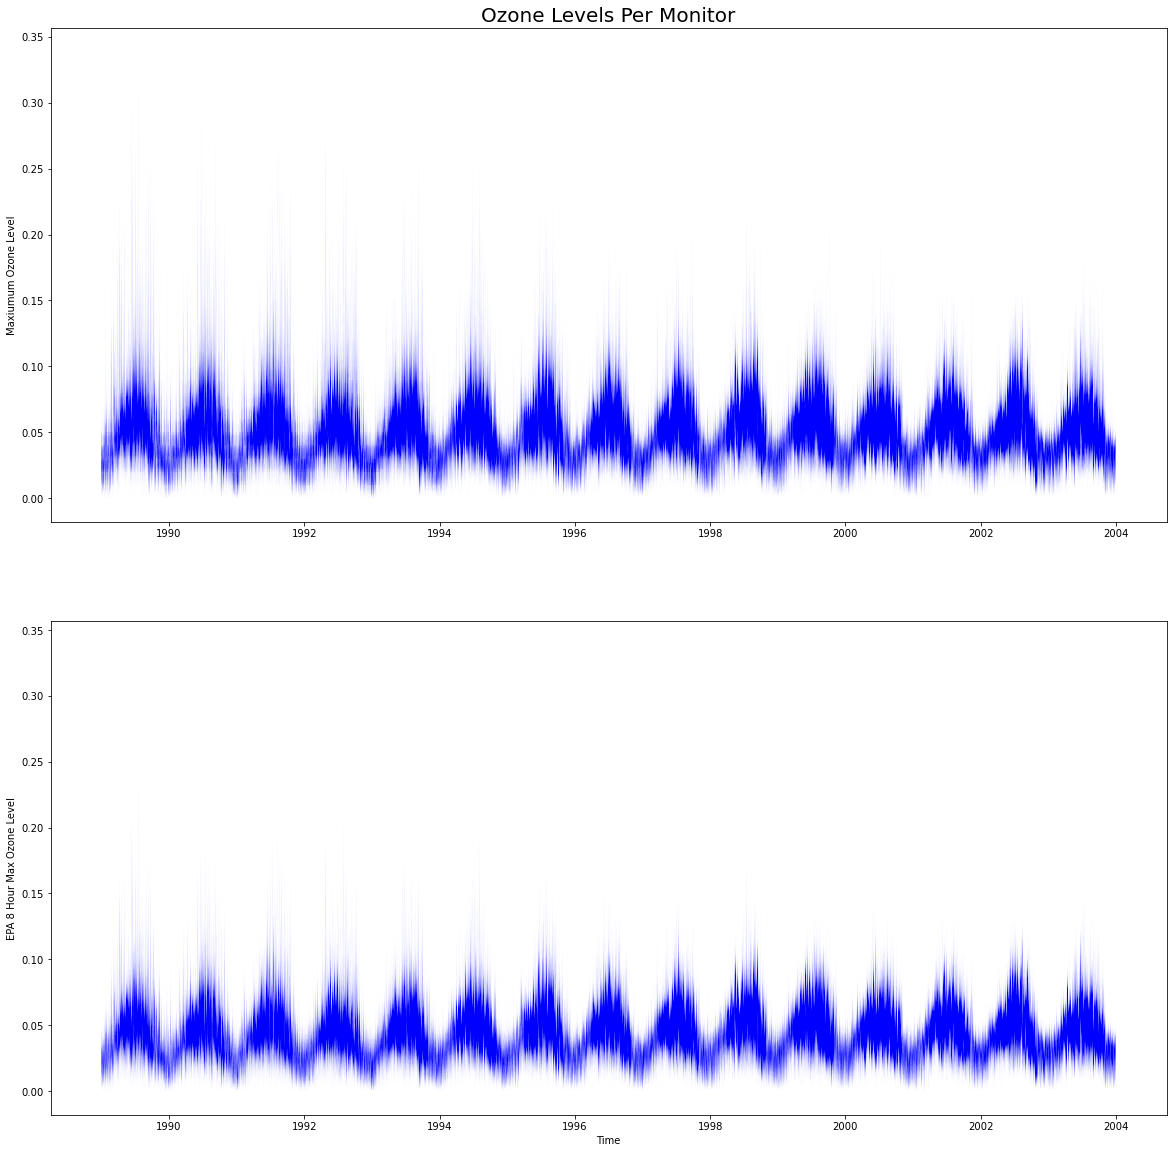

In [91]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize = (20,20), sharey = True)

.groupby("ozoneID").apply(plot_apply_func)

ax2.set_xlabel("Time")

ax1.set_ylabel("Maxiumum Ozone Level")

ax2.set_ylabel("EPA 8 Hour Max Ozone Level")

ax1.set_title('Ozone Levels Per Monitor', fontsize=20)

plt.show()


In [ ]:
state_county_urban = author_final.groupby(["state_code", "county_code", "fips", "urban"]).size().reset_index()
county_urban_designation = state_county_urban.drop(columns = 0)
county_urban_designation.to_csv("county_urban_designation.csv")

In [ ]:
# 3 = suburban
# 2 = rural
# 1 = urban

Add Fips

In [ ]:
county_list = county_list.rename(columns = {"state_code": "State Code", "county_code":"County Code"})
county_list

In [ ]:
test4 = test.merge(county_list, how = "left", on = ["State Code", "County Code"])

In [ ]:
test4

In [ ]:
test = pd.read_csv(EPA_dir + r"\Filtered EPA Data/filtered_1989_EPA.csv", low_memory = False, index_col = 0)

In [ ]:
test2 = test.merge(county_list, on = ["State Code", "County Code"])
test2

In [ ]:
indicator = [x not in all_neighbor_fips for x in test2["fips"]]

In [ ]:
test3 = test2[indicator]
test3

In [ ]:
date = "1989-06-01"

In [ ]:
int(date[5:7]) in [6, 7, 8]

# Remaking Urban Designation

In [7]:
author_final


,state_code,county_code,site_id,valid,epa_8hr,ozone_max,day,month,year,Date,fips,state,county,partial,partialinfo,regtype,fedvssip,psi,sulfur,sulfurppm,rfgtype,noxeffect,RVPStart,RVPEnd,RFGStart,RFGEnd,RegFlag,RVPI,treat_rvpII,treat_rfg,treat_rvpI,treat_CARB,TreatRFG,panelid,RFGStart2,RFGEnd2,TreatRVPII,RVPStart2,RVPEnd2,TreatCARB,TreatRFGCA,RVPCty,RFGCty,CARBCty,TreatRVPca,_merge2,_merge3,SiteObs,TempMax,TempMin,EstTempFlag,NOtherStation,SiteObsprcp,Rain,Snow,EstTempFlagprcp,NumOffMax,NumOffMin,NumOff1Max,NumOff1Min,NOtherStationprcp,_merge,urban,_mergeurb
0,1,1,3,7.0,0.054250,0.068,1.0,9.0,1989.0,1989-09-01,1001.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,10.5,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,345.0,96.0,74.0,0.0,NaN,345.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,3
1,1,1,3,3.0,0.020500,0.036,2.0,9.0,1989.0,1989-09-02,1001.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,10.5,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,345.0,94.0,74.0,0.0,NaN,345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,3
2,1,1,3,12.0,0.070125,0.079,3.0,9.0,1989.0,1989-09-03,1001.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,10.5,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,345.0,97.0,73.0,0.0,NaN,345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,3
3,1,1,3,12.0,0.053875,0.059,4.0,9.0,1989.0,1989-09-04,1001.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,10.5,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,345.0,97.0,74.0,0.0,NaN,345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,3
4,1,1,3,12.0,0.059125,0.065,5.0,9.0,1989.0,1989-09-05,1001.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,10.5,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,345.0,88.0,71.0,0.0,NaN,345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197042,72,33,6,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2
5197043,72,33,8,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2
5197044,72,54,1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2
5197045,72,137,2,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2


In [5]:
author_final = pd.read_stata(current_dir + "\Author Data\AER20090377_FinalData.dta")

In [6]:
author_final.head()

,state_code,county_code,site_id,valid,epa_8hr,ozone_max,day,month,year,Date,fips,state,county,partial,partialinfo,regtype,fedvssip,psi,sulfur,sulfurppm,rfgtype,noxeffect,RVPStart,RVPEnd,RFGStart,RFGEnd,RegFlag,RVPI,treat_rvpII,treat_rfg,treat_rvpI,treat_CARB,TreatRFG,panelid,RFGStart2,RFGEnd2,TreatRVPII,RVPStart2,RVPEnd2,TreatCARB,TreatRFGCA,RVPCty,RFGCty,CARBCty,TreatRVPca,_merge2,_merge3,SiteObs,TempMax,TempMin,EstTempFlag,NOtherStation,SiteObsprcp,Rain,Snow,EstTempFlagprcp,NumOffMax,NumOffMin,NumOff1Max,NumOff1Min,NOtherStationprcp,_merge,urban,_mergeurb
0,1,1,3,7.0,0.054250,0.068,1.0,9.0,1989.0,1989-09-01,1001.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,10.5,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,345.0,96.0,74.0,0.0,NaN,345.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,3
1,1,1,3,3.0,0.020500,0.036,2.0,9.0,1989.0,1989-09-02,1001.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,10.5,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,345.0,94.0,74.0,0.0,NaN,345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,3
2,1,1,3,12.0,0.070125,0.079,3.0,9.0,1989.0,1989-09-03,1001.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,10.5,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,345.0,97.0,73.0,0.0,NaN,345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,3
3,1,1,3,12.0,0.053875,0.059,4.0,9.0,1989.0,1989-09-04,1001.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,10.5,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,345.0,97.0,74.0,0.0,NaN,345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,3
4,1,1,3,12.0,0.059125,0.065,5.0,9.0,1989.0,1989-09-05,1001.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,10.5,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,345.0,88.0,71.0,0.0,NaN,345.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,3


In [28]:
author_final["Rain"].value_counts()

0.000000     3788326
1.000000       88349
2.000000       77085
3.000000       56046
5.000000       49243
              ...   
14.473854          1
51.464199          1
6.648361           1
11.377359          1
3.342760           1
Name: Rain, Length: 162838, dtype: int64

In [8]:
county_list = pd.read_stata(current_dir + "\Author Data\AER20090377_CountyList.dta")

In [9]:
county_list

,fips,state_code,county_code,county_desc,population,min_latitude,max_latitude,min_longitude,max_longitude
0,01001,1,1,Autauga,43671,32.307499,32.706669,-86.919441,-86.411110
1,01003,1,3,Baldwin,140415,30.221111,31.317778,-88.028610,-87.371391
2,01005,1,5,Barbour,29038,31.617500,32.148056,-85.747780,-85.050278
3,01007,1,7,Bibb,20826,32.830002,33.245834,-87.421387,-86.875832
4,01009,1,9,Blount,51024,33.764999,34.259998,-86.963608,-86.302780
...,...,...,...,...,...,...,...,...,...
3270,80028,80,28,TAMAULIPAS,1,NaN,NaN,NaN,NaN
3271,80029,80,29,TLAXCALA,1,NaN,NaN,NaN,NaN
3272,80030,80,30,VERACRUZ-LLAVE,1,NaN,NaN,NaN,NaN
3273,80031,80,31,YUCATAN,1,NaN,NaN,NaN,NaN


In [33]:
no_na_dates = author_final[author_final["Datetime"] == author_final["Datetime"]]

In [57]:
columns_want = "RVPStart	RVPEnd	RFGStart	RFGEnd	RegFlag	RVPI	treat_rvpII	treat_rfg	treat_rvpI	treat_CARB	TreatRFG	panelid	RFGStart2	RFGEnd2	TreatRVPII	RVPStart2	RVPEnd2	TreatCARB	TreatRFGCA	RVPCty	RFGCty	CARBCty	TreatRVPca".split("\t")

In [59]:
treatment_indicators = no_na_dates.groupby(["fips", "month", "year"])[columns_want].first()

In [60]:
treatment_indicators.to_csv("treatment_indicators.csv")

In [56]:
author_final["TreatRFG"].value_counts()

0.000000    4773798
1.000000     279034
0.933333       5164
0.900000       5161
0.600000       5152
0.833333       5152
0.500000       5149
0.966667       5149
0.633333       5148
0.800000       5148
0.566667       5147
0.533333       5147
0.866667       5141
0.666667       5141
0.700000       5137
0.733333       5136
0.766667       5132
0.466667       4803
0.433333       4799
0.400000       4796
0.366667       4792
0.333333       4792
0.300000       4789
0.100000       4786
0.266667       4783
0.133333       4781
0.066667       4779
0.233333       4778
0.200000       4777
0.033333       4774
0.166667       4772
Name: TreatRFG, dtype: int64

In [38]:
author_final[author_final["TreatRFG"] > 0]

,state_code,county_code,site_id,valid,epa_8hr,ozone_max,day,month,year,Date,fips,state,county,partial,partialinfo,regtype,fedvssip,psi,sulfur,sulfurppm,rfgtype,noxeffect,RVPStart,RVPEnd,RFGStart,RFGEnd,RegFlag,RVPI,treat_rvpII,treat_rfg,treat_rvpI,treat_CARB,TreatRFG,panelid,RFGStart2,RFGEnd2,TreatRVPII,RVPStart2,RVPEnd2,TreatCARB,TreatRFGCA,RVPCty,RFGCty,CARBCty,TreatRVPca,_merge2,_merge3,SiteObs,TempMax,TempMin,EstTempFlag,NOtherStation,SiteObsprcp,Rain,Snow,EstTempFlagprcp,NumOffMax,NumOffMin,NumOff1Max,NumOff1Min,NOtherStationprcp,_merge,urban,_mergeurb,Datetime,ozoneID
103613,4,13,13,12.0,0.050950,0.0609,6.0,7.0,1997.0,1997-07-06,4013.0,AZ,Maricopa,Y,see Kurt's list,RVP,F,7.8,N,NaN,,,1997-06-01,1997-08-03,1997-08-04,1997-09-30,1.0,0.0,1.0,0.0,0.0,0.0,0.033333,45.0,13730.0,13787.0,1.0,13666.0,13729.0,0.0,0.033333,1.0,1.0,0.0,1.0,3.0,3.0,3618.0,105.0,72.0,0.0,NaN,3618.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,3,1997-07-06,"(4, 13, 13)"
103614,4,13,13,12.0,0.047025,0.0530,7.0,7.0,1997.0,1997-07-07,4013.0,AZ,Maricopa,Y,see Kurt's list,RVP,F,7.8,N,NaN,,,1997-06-01,1997-08-03,1997-08-04,1997-09-30,1.0,0.0,1.0,0.0,0.0,0.0,0.066667,45.0,13730.0,13787.0,1.0,13666.0,13729.0,0.0,0.066667,1.0,1.0,0.0,1.0,3.0,3.0,3618.0,104.0,71.0,0.0,NaN,3618.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,3,1997-07-07,"(4, 13, 13)"
103615,4,13,13,12.0,0.050975,0.0561,8.0,7.0,1997.0,1997-07-08,4013.0,AZ,Maricopa,Y,see Kurt's list,RVP,F,7.8,N,NaN,,,1997-06-01,1997-08-03,1997-08-04,1997-09-30,1.0,0.0,1.0,0.0,0.0,0.0,0.100000,45.0,13730.0,13787.0,1.0,13666.0,13729.0,0.0,0.100000,1.0,1.0,0.0,1.0,3.0,3.0,3618.0,105.0,68.0,0.0,NaN,3618.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,3,1997-07-08,"(4, 13, 13)"
103616,4,13,13,11.0,0.052612,0.0612,9.0,7.0,1997.0,1997-07-09,4013.0,AZ,Maricopa,Y,see Kurt's list,RVP,F,7.8,N,NaN,,,1997-06-01,1997-08-03,1997-08-04,1997-09-30,1.0,0.0,1.0,0.0,0.0,0.0,0.133333,45.0,13730.0,13787.0,1.0,13666.0,13729.0,0.0,0.133333,1.0,1.0,0.0,1.0,3.0,3.0,3618.0,102.0,69.0,0.0,NaN,3618.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,3,1997-07-09,"(4, 13, 13)"
103617,4,13,13,12.0,0.061138,0.0674,10.0,7.0,1997.0,1997-07-10,4013.0,AZ,Maricopa,Y,see Kurt's list,RVP,F,7.8,N,NaN,,,1997-06-01,1997-08-03,1997-08-04,1997-09-30,1.0,0.0,1.0,0.0,0.0,0.0,0.166667,45.0,13730.0,13787.0,1.0,13666.0,13729.0,0.0,0.166667,1.0,1.0,0.0,1.0,3.0,3.0,3618.0,102.0,69.0,0.0,NaN,3618.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,3,1997-07-10,"(4, 13, 13)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5182723,55,133,27,11.0,0.025250,0.0300,10.0,10.0,2006.0,2006-10-10,55133.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,1945.0,16953.0,17059.0,0.0,NaN,NaN,0.0,0.166667,0.0,1.0,0.0,0.0,3.0,3.0,545.0,57.0,44.0,0.0,NaN,545.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,3.0,1.0,3,2006-10-10,"(55, 133, 27)"
5182724,55,133,27,12.0,0.024375,0.0250,11.0,10.0,2006.0,2006-10-11,55133.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.133333,1945.0,16953.0,17059.0,0.0,NaN,NaN,0.0,0.133333,0.0,1.0,0.0,0.0,3.0,3.0,545.0,52.0,45.0,0.0,NaN,545.0,48.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,3.0,1.0,3,2006-10-11,"(55, 133, 27)"
5182725,55,133,27,12.0,0.028500,0.0310,12.0,10.0,2006.0,2006-10-12,55133.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,1945.0,16953.0,17059.0,0.0,NaN,NaN,0.0,0.100000,0.0,1.0,0.0,0.0,3.0,3.0,545.0,55.0,27.0,0.0,NaN,545.0,12.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,3.0,1.0,3,2006-10-12,"(55, 133, 27)"
5182726,55,133,27,12.0,0.025500,0.0240,13.0,10.0,2006.0,2006-10-13,55133.0,,,,,,,NaN,,NaN,,,NaT,NaT,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,1945.0,16953.0,17059.0,0.0,NaN,NaN,0.0,0.066667,0.0,1.0,0.0,0.0,3.0,3.0,545.0,37.0,27.0,0.0,NaN,545.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,3.0,1.0,3,2006-10-13,"(55, 133, 27)"


In [46]:
output = county_list.merge(state_fip, on = "state_code")

In [43]:
state_fip = pd.read_excel("state fip codes.xlsx").rename(columns = {"FIP Code":"state_code"})

In [49]:
output.to_csv("fip_codes_list.csv")